In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
!conda install -q -y -c rdkit rdkit python=3.7

--2022-01-27 17:17:51--  https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.200.79, 104.18.201.79, 2606:4700::6812:c94f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.200.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh [following]
--2022-01-27 17:17:51--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ | / - \ | / - \ | / - \ failed with initial froz

In [ ]:
!python -c "import site; print (site.getsitepackages())"

['/usr/local/lib/python3.7/site-packages']


In [ ]:
import sys
import pprint
pprint.pprint(sys.path)
sys.path.append('/usr/local/lib/python3.7/site-packages/')
from rdkit import rdBase
print(rdBase.rdkitVersion)

['',
 '/content',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/usr/local/lib/python3.7/site-packages/',
 '/usr/local/lib/python3.7/site-packages/']
2020.09.1


In [ ]:
from keras.models import Model
from tensorflow import keras
import numpy as np
from sklearn import model_selection
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from keras.layers import Activation, Dense, Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.optimizers import Adam

X2_train=np.load("/content/drive/MyDrive/Colab Notebooks/lab/X2_train.npy")
X2_test=np.load("/content/drive/MyDrive/Colab Notebooks/lab/X2_test.npy")
y2_train=np.load("/content/drive/MyDrive/Colab Notebooks/lab/y2_train.npy")
y2_test=np.load("/content/drive/MyDrive/Colab Notebooks/lab/y2_test.npy")


from keras.layers import Input, Dense, Dropout
from keras.models import Model
inputs = Input(shape=(2**11,))

xx = Dense(2**10, activation='tanh', kernel_regularizer=keras.regularizers.l2(0.001))(inputs)
xx = Dropout(.2)(xx)
xx = Dense(2**5, activation='tanh', kernel_regularizer=keras.regularizers.l2(0.001))(xx)
xx = Dropout(.2)(xx)
xx = Dense(2**2, activation='tanh', kernel_regularizer=keras.regularizers.l2(0.001))(xx)
xx = Dropout(.2)(xx)
xx = Dense(2**5, activation='tanh', kernel_regularizer=keras.regularizers.l2(0.001))(xx)
xx = Dropout(.2)(xx)
xx = Dense(2**2, activation='tanh', kernel_regularizer=keras.regularizers.l2(0.001))(xx)
xx = Dropout(.2)(xx)

predictions = Dense(1, activation='linear')(xx)

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

model2 = Model(inputs=inputs, outputs=predictions)

model2.compile(Adam(lr=1e-3), loss="mean_squared_error")

model2.summary()

history = model2.fit(X2_train, y2_train, batch_size=128, epochs=2000, validation_data=(X2_test, y2_test),callbacks=[early_stop])

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 2048)]            0         
                                                                 
 dense_12 (Dense)            (None, 1024)              2098176   
                                                                 
 dropout_10 (Dropout)        (None, 1024)              0         
                                                                 
 dense_13 (Dense)            (None, 32)                32800     
                                                                 
 dropout_11 (Dropout)        (None, 32)                0         
                                                                 
 dense_14 (Dense)            (None, 4)                 132       
                                                                 
 dropout_12 (Dropout)        (None, 4)                 0   

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/2000
1/1 [==============================] - 1s 1s/step - loss: 2.6388 - val_loss: 1.8735
Epoch 2/2000
1/1 [==============================] - 0s 66ms/step - loss: 2.3625 - val_loss: 1.6408
Epoch 3/2000
1/1 [==============================] - 0s 73ms/step - loss: 2.0020 - val_loss: 1.4759
Epoch 4/2000
1/1 [==============================] - 0s 59ms/step - loss: 1.8998 - val_loss: 1.3391
Epoch 5/2000
1/1 [==============================] - 0s 64ms/step - loss: 1.8381 - val_loss: 1.3033
Epoch 6/2000
1/1 [==============================] - 0s 61ms/step - loss: 1.7168 - val_loss: 1.3111
Epoch 7/2000
1/1 [==============================] - 0s 62ms/step - loss: 1.5114 - val_loss: 1.2969
Epoch 8/2000
1/1 [==============================] - 0s 61ms/step - loss: 1.5561 - val_loss: 1.2831
Epoch 9/2000
1/1 [==============================] - 0s 64ms/step - loss: 1.6061 - val_loss: 1.2427
Epoch 10/2000
1/1 [==============================] - 0s 71ms/step - loss: 1.4291 - val_loss: 1.2072
Epoch 11/20

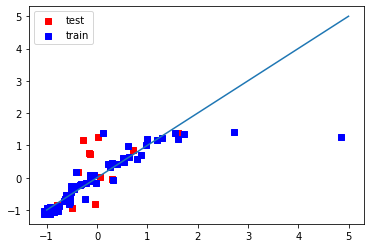

In [ ]:
import matplotlib.pyplot as plt
Y2_pred_t = model2.predict(X2_test)
Y2_train_pred_t = model2.predict(X2_train)
plt.scatter(y2_test, Y2_pred_t, c='r', marker='s',label="test")
plt.scatter(y2_train, Y2_train_pred_t, c='b', marker='s',label="train")
plt.legend()
plt.plot([-1,5],[-1,5])

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

dt = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/lab/H_ORAC.csv")
dt.head()

from rdkit import Chem
from rdkit.Chem import Draw
mols = [Chem.MolFromSmiles(smile) for smile in dt['SMILES']]

In [ ]:
from rdkit.Chem import AllChem
import numpy as np
fingerprints = []
safe = []
for mol_idx, mol in enumerate(mols):
    try:
        fingerprint = [x for x in AllChem.GetMorganFingerprintAsBitVect(mol, 2, 2**11)]
        fingerprints.append(fingerprint)
        safe.append(mol_idx)
    except:
        print("Error", mol_idx)
        continue
fingerprints = np.array(fingerprints)
print(fingerprints.shape)
pd.DataFrame(fingerprints).head()

(70, 2048)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X2=fingerprints
X2 = np.array(X2, dtype = np.float32)
np.save("/content/drive/MyDrive/Colab Notebooks/lab/X_2d_ORAC.npy", X2)
print(X2)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:

from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from keras.models import Sequential
from keras.layers import Dense, Activation, Input, Dropout
Y2=[y for y in dt['H_ORAC']]

Y2 = np.array(Y2, dtype = np.float32)

Ave=Y2.mean()
Std=Y2.std(ddof=1)

Y2=(Y2 - Ave )/ Std

np.save("/content/drive/MyDrive/Colab Notebooks/lab/Y_2d_ORAC.npy", Y2)
print(Y2)

[-0.5434038  -0.1577336  -0.45749253 -0.2201499  -0.53286856  0.21718943
  0.517175    0.3992576   0.96539456 -0.06432275  4.858367    0.71591735
  0.86406463 -0.3478773   0.12073161  0.54230046  0.29801032  0.2953972
  0.8034653  -0.92614245 -0.235798    0.6265299  -0.80607396 -0.5244356
 -0.61346394 -0.62144846 -0.61873865 -0.31283364 -1.0512096  -1.0507561
 -1.0488456   0.26605016  0.05566086 -0.92539907 -0.03932004 -0.99443716
 -0.28263178 -0.77516484 -0.559626   -0.6305682  -0.45141768 -0.3848276
 -0.42543682 -0.5228378   2.7227314  -0.78508466 -1.0499865  -0.02662846
 -0.7496714   1.2863741   1.7340133  -0.47654933  1.5442306  -0.13065857
 -0.8465681   0.31667623 -0.7957791  -0.66367626  0.6136809   1.1964297
  1.6072878   1.611745    0.02019791 -0.14124039 -0.8637594  -0.9887596
  0.99622774 -0.4986037  -0.91868335 -0.13418403]


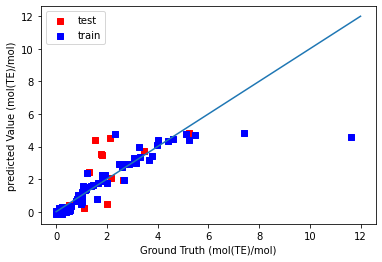

In [ ]:
y3_test=y2_test*Std+Ave
Y3_train_pred_t=Y2_train_pred_t*Std+Ave
y3_train=y2_train*Std+Ave
Y3_pred_t=Y2_pred_t*Std+Ave
plt.scatter(y3_test, Y3_pred_t, c='r', marker='s',label="test")
plt.scatter(y3_train, Y3_train_pred_t, c='b', marker='s',label="train")
plt.xlabel('Ground Truth (mol(TE)/mol)')
plt.ylabel('predicted Value (mol(TE)/mol)')
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.plot([0,12],[0,12])
plt.legend()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
print(mean_squared_error(y3_test, Y3_pred_t))
print(mean_squared_error(y3_train, Y3_train_pred_t))

1.8081678
1.2545444


In [ ]:
y3_test

array([1.7578087 , 1.7902164 , 5.2259235 , 2.6481717 , 0.26260805,
       1.0880283 , 1.5123945 , 1.3115885 , 0.11375833, 3.4744575 ,
       2.1074288 , 1.9904811 , 2.1771104 , 0.50410426], dtype=float32)

In [ ]:
Y3_pred_t

array([[ 3.5402274 ],
       [ 3.47975   ],
       [ 4.80206   ],
       [ 1.9759266 ],
       [ 0.23976922],
       [ 0.2272917 ],
       [ 4.3873787 ],
       [ 2.429061  ],
       [-0.13722682],
       [ 3.7370763 ],
       [ 4.5445104 ],
       [ 0.47186923],
       [ 2.0825634 ],
       [ 0.4086249 ]], dtype=float32)

In [ ]:
print(max(y3_train))

11.614014


In [ ]:
print(max(Y3_train_pred_t))

[4.8239565]
